## Feature Selection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [75]:
data_df = pd.read_csv('/content/drive/My Drive/Datathon/processed_data/final_data.csv').drop(columns=['Unnamed: 0'], axis=1)
data_df.head()

,VenueID,CheckinBefore,CheckinAfter,NearPlaceEntropy,OlympicDistance,NearestStationDistance,StationPagerank
0,4abe4502f964a520558c20e3,33,31,0.238129,1.160000,0.56,0.004480
1,4abf8c03f964a520079120e3,57,24,0.115433,1.850000,0.30,0.002550
2,4ac51183f964a52048a020e3,6,6,1.133732,2.730000,0.95,0.002845
3,4ac51183f964a52049a020e3,2,6,0.256612,2.113333,0.43,0.002632
4,4ac518b4f964a52072a020e3,4,4,0.171440,1.256667,0.32,0.002410


In [76]:
len(data_df)

359

In [77]:
data_df['StationConnectivity'] = data_df['StationPagerank'] / data_df['NearestStationDistance']
data_df.head()

,VenueID,CheckinBefore,CheckinAfter,NearPlaceEntropy,OlympicDistance,NearestStationDistance,StationPagerank,StationConnectivity
0,4abe4502f964a520558c20e3,33,31,0.238129,1.160000,0.56,0.004480,0.007999
1,4abf8c03f964a520079120e3,57,24,0.115433,1.850000,0.30,0.002550,0.008502
2,4ac51183f964a52048a020e3,6,6,1.133732,2.730000,0.95,0.002845,0.002994
3,4ac51183f964a52049a020e3,2,6,0.256612,2.113333,0.43,0.002632,0.006120
4,4ac518b4f964a52072a020e3,4,4,0.171440,1.256667,0.32,0.002410,0.007530


In [78]:
venue_df = pd.read_csv('/content/drive/My Drive/Datathon/processed_data/venue_main_category.csv')
venue_df.head()

,Venue ID,Latitude,Longitude,Category,MainCategory
0,4aec9f4bf964a52091c921e3,51.498044,-0.090546,Pub,Nightlife Spot
1,4b9024ccf964a5204a7833e3,51.514978,-0.302248,Restaurant,Food
2,4bd9dff02a3a0f4726a7a8b6,51.516956,-0.070255,Indian Restaurant,Food
3,4b044900f964a520e05222e3,51.507220,-0.221701,Portuguese Restaurant,Food
4,4f6880ce6b74aa26bb61f7ac,51.522703,-0.085487,Coworking Space,Professional & Other Places


In [79]:
venue_df['MainCategory'].unique()

array(['Nightlife Spot', 'Food', 'Professional & Other Places',
       'Arts & Entertainment', 'Shop & Service', 'Residence',
       'Travel & Transport', 'Outdoors & Recreation', 'Event',
       'College & University'], dtype=object)

In [80]:
# food_df = venue_df[venue_df['MainCategory'] == 'Travel & Transport']
food_df = venue_df
food_df.head()

,Venue ID,Latitude,Longitude,Category,MainCategory
0,4aec9f4bf964a52091c921e3,51.498044,-0.090546,Pub,Nightlife Spot
1,4b9024ccf964a5204a7833e3,51.514978,-0.302248,Restaurant,Food
2,4bd9dff02a3a0f4726a7a8b6,51.516956,-0.070255,Indian Restaurant,Food
3,4b044900f964a520e05222e3,51.507220,-0.221701,Portuguese Restaurant,Food
4,4f6880ce6b74aa26bb61f7ac,51.522703,-0.085487,Coworking Space,Professional & Other Places


In [81]:
assert len(food_df) == len(food_df['Venue ID'].unique())

In [82]:
food_df['VenueID'] = food_df['Venue ID']
adj_food_df = food_df.drop(['Venue ID'], axis=1)
adj_food_df.head()

,Latitude,Longitude,Category,MainCategory,VenueID
0,51.498044,-0.090546,Pub,Nightlife Spot,4aec9f4bf964a52091c921e3
1,51.514978,-0.302248,Restaurant,Food,4b9024ccf964a5204a7833e3
2,51.516956,-0.070255,Indian Restaurant,Food,4bd9dff02a3a0f4726a7a8b6
3,51.507220,-0.221701,Portuguese Restaurant,Food,4b044900f964a520e05222e3
4,51.522703,-0.085487,Coworking Space,Professional & Other Places,4f6880ce6b74aa26bb61f7ac


In [83]:
food_data = pd.merge(data_df, adj_food_df, how='inner', on='VenueID')
food_data.head()

,VenueID,CheckinBefore,CheckinAfter,NearPlaceEntropy,OlympicDistance,NearestStationDistance,StationPagerank,StationConnectivity,Latitude,Longitude,Category,MainCategory
0,4abe4502f964a520558c20e3,33,31,0.238129,1.160000,0.56,0.004480,0.007999,51.501303,-0.142103,Castle,Outdoors & Recreation
1,4abf8c03f964a520079120e3,57,24,0.115433,1.850000,0.30,0.002550,0.008502,51.499166,-0.162885,Department Store,Shop & Service
2,4ac51183f964a52048a020e3,6,6,1.133732,2.730000,0.95,0.002845,0.002994,51.535645,-0.155740,Zoo,Arts & Entertainment
3,4ac51183f964a52049a020e3,2,6,0.256612,2.113333,0.43,0.002632,0.006120,51.491043,-0.127888,Art Museum,Arts & Entertainment
4,4ac518b4f964a52072a020e3,4,4,0.171440,1.256667,0.32,0.002410,0.007530,51.505323,-0.150719,Hotel,Travel & Transport


In [84]:
jq = pd.read_csv('/content/drive/My Drive/Datathon/jenson_data/JensenQ.csv',index_col=0)
jq.columns = ['VenueID','Latitude','Longitude','Category','JensenQ']

In [20]:
jq.head()

,VenueID,Latitude,Longitude,Category,JensenQ
0,4c18fe2d6a21c9b670d6c997,51.470664,-0.457907,Airport Terminal,23.723239
1,4ac518cef964a520f5a520e3,51.513684,-0.099435,Church,30.115709
2,4badfc5af964a5202e783be3,51.516835,-0.404166,Coffee Shop,-158.889827
3,4b409606f964a52025b925e3,51.536139,-0.103168,Park,25.455301
4,4ac518d1f964a520e0a620e3,51.508182,-0.087547,Bridge,340.255437


In [85]:
 merge_df = pd.merge(food_data, jq, how='inner', on='VenueID')
 merge_df

,VenueID,CheckinBefore,CheckinAfter,NearPlaceEntropy,OlympicDistance,NearestStationDistance,StationPagerank,StationConnectivity,Latitude_x,Longitude_x,Category_x,MainCategory,Latitude_y,Longitude_y,Category_y,JensenQ
0,4abe4502f964a520558c20e3,33,31,0.238129,1.160000,0.56,0.004480,0.007999,51.501303,-0.142103,Castle,Outdoors & Recreation,51.501303,-0.142103,Castle,-152.657232
1,4abf8c03f964a520079120e3,57,24,0.115433,1.850000,0.30,0.002550,0.008502,51.499166,-0.162885,Department Store,Shop & Service,51.499166,-0.162885,Department Store,-63.487585
2,4ac51183f964a52049a020e3,2,6,0.256612,2.113333,0.43,0.002632,0.006120,51.491043,-0.127888,Art Museum,Arts & Entertainment,51.491043,-0.127888,Art Museum,-1960.503592
3,4ac518b4f964a52072a020e3,4,4,0.171440,1.256667,0.32,0.002410,0.007530,51.505323,-0.150719,Hotel,Travel & Transport,51.505323,-0.150719,Hotel,-61.004424
4,4ac518b5f964a520c2a020e3,1,4,0.076306,1.133333,0.17,0.005852,0.034422,51.508055,-0.143844,Hotel,Travel & Transport,51.508055,-0.143844,Hotel,13.028805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,5036b369cc6417d4bcd9a160,11,7,0.191981,2.490000,0.23,0.007047,0.030641,51.491631,-0.193961,Subway,Travel & Transport,51.491631,-0.193961,Subway,-122.338836
302,5036b36dcc6417d4bcd9a280,1,11,0.682391,3.256667,0.01,0.005260,0.526025,51.563503,-0.279689,Subway,Travel & Transport,51.563503,-0.279689,Subway,-388.572584
303,506999643d7cfe42e733a829,8,9,0.312434,12.550000,7.54,0.003593,0.000477,51.375892,-0.092692,Train Station,Travel & Transport,51.375892,-0.092692,Train Station,-21.766777
304,5069996c3d7cfe42e733ac43,17,7,1.253114,9.703333,6.23,0.002125,0.000341,51.417719,-0.060684,Train Station,Travel & Transport,51.417719,-0.060684,Train Station,-58.152937


In [86]:
len(merge_df)

306

In [87]:
food_features = merge_df[['VenueID', 'CheckinBefore', 'CheckinAfter', 'NearPlaceEntropy', 'OlympicDistance', 'StationConnectivity','JensenQ']]
food_features.head()

,VenueID,CheckinBefore,CheckinAfter,NearPlaceEntropy,OlympicDistance,StationConnectivity,JensenQ
0,4abe4502f964a520558c20e3,33,31,0.238129,1.160000,0.007999,-152.657232
1,4abf8c03f964a520079120e3,57,24,0.115433,1.850000,0.008502,-63.487585
2,4ac51183f964a52049a020e3,2,6,0.256612,2.113333,0.006120,-1960.503592
3,4ac518b4f964a52072a020e3,4,4,0.171440,1.256667,0.007530,-61.004424
4,4ac518b5f964a520c2a020e3,1,4,0.076306,1.133333,0.034422,13.028805


In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
food_features_normed = pd.DataFrame(scaler.fit_transform(food_features.iloc[:,3:]),columns = food_features.iloc[:,3:].columns)
norm_df0 = pd.concat([food_features.iloc[:,:3], food_features_normed],axis=1)
norm_df0.head()

,VenueID,CheckinBefore,CheckinAfter,NearPlaceEntropy,OlympicDistance,StationConnectivity,JensenQ
0,4abe4502f964a520558c20e3,33,31,-0.319040,-0.894141,-0.396158,-0.386313
1,4abf8c03f964a520079120e3,57,24,-0.561033,-0.694712,-0.389802,-0.178088
2,4ac51183f964a52049a020e3,2,6,-0.282586,-0.618601,-0.419931,-4.607920
3,4ac518b4f964a52072a020e3,4,4,-0.450571,-0.866202,-0.402093,-0.172289
4,4ac518b5f964a520c2a020e3,1,4,-0.638202,-0.901849,-0.061836,0.000590


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


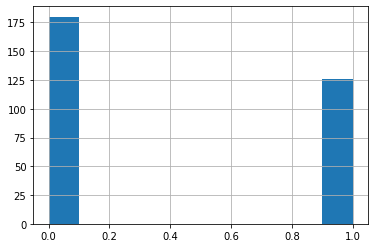

In [89]:
X = norm_df0[norm_df0.columns[3:]]
X['Target'] = (norm_df0['CheckinAfter'] > norm_df0['CheckinBefore']).astype(int)
y = X['Target']
y.hist()

In [29]:
# X.drop(['StationPagerank', 'NearestStationDistance'], axis=1, inplace=True)
X.head()

,NearPlaceEntropy,OlympicDistance,StationConnectivity,JensenQ,Target
0,0.058079,0.010458,0.013366,0.296433,0
1,0.022272,0.055556,0.014225,0.311055,0
2,0.063473,0.072767,0.010154,0.000000,1
3,0.038617,0.016776,0.012564,0.311462,0
4,0.010853,0.008715,0.058534,0.323601,1


In [30]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Target, dtype: int64

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [91]:
X_train.head()

,NearPlaceEntropy,OlympicDistance,StationConnectivity,JensenQ,Target
93,-0.502780,-0.305488,-0.425958,-0.211987,0
221,0.042215,0.106858,-0.424224,-0.453647,1
289,-0.582069,-0.228414,-0.402246,0.115272,0
299,0.291628,-0.184096,-0.430670,-0.327236,1
298,2.629015,1.484558,-0.493546,-0.511750,1


In [92]:
y_train.head()

93     0
221    1
289    0
299    1
298    1
Name: Target, dtype: int64

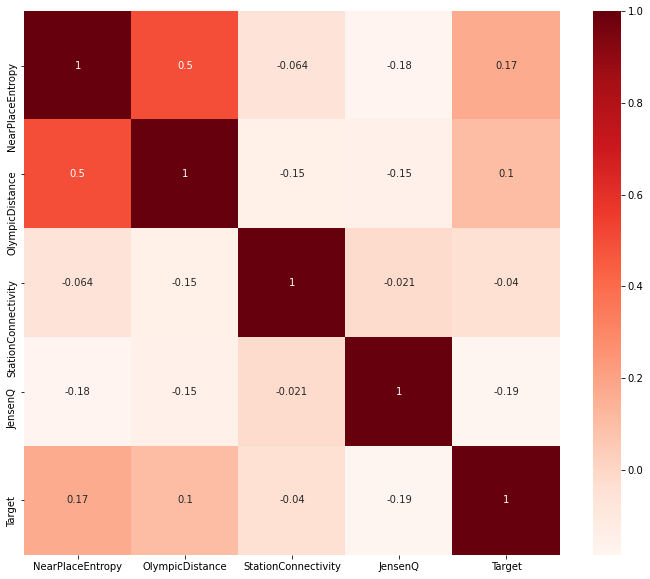

In [93]:
# Pearson Correlation
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [94]:
print(X_train.columns)

Index(['NearPlaceEntropy', 'OlympicDistance', 'StationConnectivity', 'JensenQ',
       'Target'],
      dtype='object')


In [95]:
for i in range(len(X_train.columns) - 1):
  for j in range(i + 1, len(X_train.columns) - 1):
    feature1 = X_train.columns[i]
    feature2 = X_train.columns[j]
    print(X_train[[feature1, feature2]].corr())
    print()

                  NearPlaceEntropy  OlympicDistance
NearPlaceEntropy          1.000000         0.497113
OlympicDistance           0.497113         1.000000

                     NearPlaceEntropy  StationConnectivity
NearPlaceEntropy             1.000000            -0.063972
StationConnectivity         -0.063972             1.000000

                  NearPlaceEntropy   JensenQ
NearPlaceEntropy          1.000000 -0.177384
JensenQ                  -0.177384  1.000000

                     OlympicDistance  StationConnectivity
OlympicDistance             1.000000            -0.147962
StationConnectivity        -0.147962             1.000000

                 OlympicDistance   JensenQ
OlympicDistance         1.000000 -0.152325
JensenQ                -0.152325  1.000000

                     StationConnectivity   JensenQ
StationConnectivity             1.000000 -0.020654
JensenQ                        -0.020654  1.000000



## Training Models

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

In [97]:
X_train = X_train.drop(['Target'], axis=1)
X_train.head()

,NearPlaceEntropy,OlympicDistance,StationConnectivity,JensenQ
93,-0.502780,-0.305488,-0.425958,-0.211987
221,0.042215,0.106858,-0.424224,-0.453647
289,-0.582069,-0.228414,-0.402246,0.115272
299,0.291628,-0.184096,-0.430670,-0.327236
298,2.629015,1.484558,-0.493546,-0.511750


In [ ]:
# X.drop(['OlympicDistance'], axis=1)

In [98]:
X.head()

,NearPlaceEntropy,OlympicDistance,StationConnectivity,JensenQ,Target
0,-0.319040,-0.894141,-0.396158,-0.386313,0
1,-0.561033,-0.694712,-0.389802,-0.178088,0
2,-0.282586,-0.618601,-0.419931,-4.607920,1
3,-0.450571,-0.866202,-0.402093,-0.172289,0
4,-0.638202,-0.901849,-0.061836,0.000590,1


In [99]:
X_test.drop(['Target'], axis=1, inplace=True)
X_test.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,NearPlaceEntropy,OlympicDistance,StationConnectivity,JensenQ
113,-0.493277,-0.409538,0.192975,-0.255724
236,1.558467,-0.414355,-0.348121,-0.020857
24,-0.638490,-0.670626,-0.342533,0.475040
273,0.592053,0.802452,-0.493027,-0.115849
64,-0.504521,-0.310305,-0.434838,-0.058473


## Logistic Regression

In [100]:
log_params = {
    'penalty': ['l2'],
    'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5]
}

logistic_clf = GridSearchCV(LogisticRegression(), log_params, scoring='roc_auc', n_jobs=-1, cv=3)

In [101]:
logistic_clf.fit(X_train, y_train)
pred = cross_val_predict(logistic_clf, X_train, y_train, cv=3)
print('With OlympicDistance')
print('Precision:', precision_score(y_train, pred))
print('Recall:', recall_score(y_train, pred))
print('AUC:', roc_auc_score(y_train, pred))
print(logistic_clf.best_params_)

With OlympicDistance
Precision: 0.5128205128205128
Recall: 0.20408163265306123
AUC: 0.5369723231758456
{'C': 0.25, 'penalty': 'l2'}


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.559


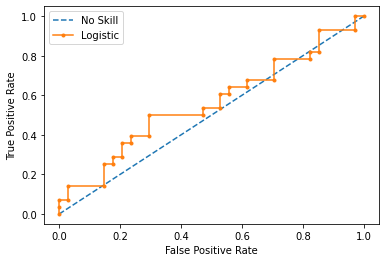

In [102]:
ns_probs = [0 for _ in range(len(y_test))]
final_log = LogisticRegression(C=1.5, penalty='l2')
final_log.fit(X_train, y_train)
lr_probs = final_log.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

# calcualte scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Random Forest

In [103]:
rf_params = {
    'n_estimators': [100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [100, 150, 200]
}

rf_clf = GridSearchCV(RandomForestClassifier(), rf_params, scoring='roc_auc', n_jobs=-1, cv=3)

In [104]:
rf_clf.fit(X_train, y_train)
rf_pred = cross_val_predict(rf_clf, X_train, y_train, cv=3)

print('With OlympicDistance')
print('Precision:', precision_score(y_train, rf_pred))
print('Recall:', recall_score(y_train, rf_pred))
print('AUC:', roc_auc_score(y_train, rf_pred))
print(rf_clf.best_params_)

With OlympicDistance
Precision: 0.44
Recall: 0.336734693877551
AUC: 0.5245317305004193
{'criterion': 'entropy', 'max_depth': 200, 'n_estimators': 200}


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.689


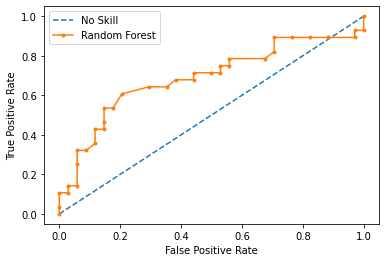

In [105]:
ns_probs = [0 for _ in range(len(y_test))]
final_rf = RandomForestClassifier(criterion='gini', max_depth=200, n_estimators=100)
final_rf.fit(X_train, y_train)
rf_probs = final_rf.predict_proba(X_test)
rf_probs = rf_probs[:, 1]

# calcualte scores
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## SVM

In [106]:
svm_params = {
    'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
    'kernel': ['linear', 'rbf', 'sigmoid'],
}

svm_clf = GridSearchCV(SVC(), svm_params, scoring='roc_auc', n_jobs=-1, cv=3)

In [107]:
svm_clf.fit(X_train, y_train)
svm_pred = cross_val_predict(SVC(), X_train, y_train, cv=3)

print('With OlympicDistance')
print('Precision:', precision_score(y_train, svm_pred))
print('Recall:', recall_score(y_train, svm_pred))
print('AUC:', roc_auc_score(y_train, svm_pred))
print(svm_clf.best_params_)

With OlympicDistance
Precision: 0.42857142857142855
Recall: 0.15306122448979592
AUC: 0.5080374615599664
{'C': 1.25, 'kernel': 'linear'}


No Skill: ROC AUC=0.500
SVM: ROC AUC=0.539


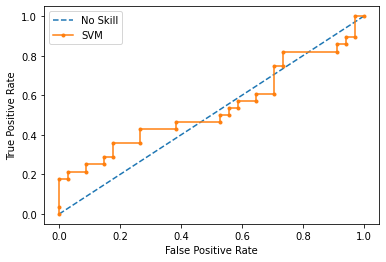

In [108]:
ns_probs = [0 for _ in range(len(y_test))]
final_svm = SVC(C=0.75, kernel='linear', probability=True)
final_svm.fit(X_train, y_train)
svm_probs = final_svm.predict_proba(X_test)
svm_probs = svm_probs[:, 1]

# calcualte scores
ns_auc = roc_auc_score(y_test, ns_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Gradient Boosted Tree

In [109]:
grad_boost_params = {
    'learning_rate': [0.25, 0.05, 0.75, 0.1],
    'n_estimators': [100, 200, 300, 400],
    'criterion': ['friedman_mse', 'mse', 'mae']
}

grad_boost_clf = GridSearchCV(GradientBoostingClassifier(), grad_boost_params, scoring='roc_auc', n_jobs=-1, cv=3)

In [110]:
grad_boost_clf.fit(X, y)
grad_boost_pred = cross_val_predict(grad_boost_clf, X, y, cv=3)

print('Precision:', precision_score(y, grad_boost_pred))
print('Recall:', recall_score(y, grad_boost_pred))
print('AUC:', roc_auc_score(y, grad_boost_pred))
print(grad_boost_clf.best_params_)

Precision: 1.0
Recall: 1.0
AUC: 1.0
{'criterion': 'friedman_mse', 'learning_rate': 0.25, 'n_estimators': 100}


In [111]:
grad_boost_pred = cross_val_predict(GradientBoostingClassifier(), X, y, cv=3)

print('Precision:', precision_score(y, grad_boost_pred))
print('Recall:', recall_score(y, grad_boost_pred))
print('AUC:', roc_auc_score(y, grad_boost_pred))
print(grad_boost_clf.best_params_)

Precision: 1.0
Recall: 1.0
AUC: 1.0
{'criterion': 'friedman_mse', 'learning_rate': 0.25, 'n_estimators': 100}


Ada-Boosted Tree

In [112]:
# {'criterion': 'entropy', 'max_depth': 100, 'n_estimators': 150}
# {'C': 0.75, 'gamma': 'scale', 'kernel': 'rbf'}
ada_boost_params = {
    'base_estimator': [RandomForestClassifier(criterion='entropy', max_depth=100, n_estimators=150),
                       SVC(C=0.75, gamma='scale', kernel='rbf')],
    'n_estimators': [50, 100, 150, 200]
}

ada_boost_clf = GridSearchCV(AdaBoostClassifier(), ada_boost_params, scoring='roc_auc', n_jobs=-1, cv=3)

In [113]:
ada_boost_clf.fit(X, y)
ada_boost_pred = cross_val_predict(ada_boost_clf, X, y, cv=3)

print('Precision:', precision_score(y, ada_boost_pred))
print('Recall:', recall_score(y, ada_boost_pred))
print('AUC:', roc_auc_score(y, ada_boost_pred))
print(ada_boost_clf.best_params_)

Precision: 1.0
Recall: 1.0
AUC: 1.0
{'base_estimator': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'n_estimators': 50}


In [114]:
ada_boost_pred = cross_val_predict(AdaBoostClassifier(base_estimator=RandomForestClassifier()), X, y, cv=3)

print('Precision:', precision_score(y, ada_boost_pred))
print('Recall:', recall_score(y, ada_boost_pred))
print('AUC:', roc_auc_score(y, ada_boost_pred))
# print(ada_boost_clf.best_params_)

Precision: 1.0
Recall: 1.0
AUC: 1.0


## Voting Classifier

In [115]:
voting_classifier_clf = VotingClassifier(estimators=[
                                                     ('svm', svm_clf), ('lr', logistic_clf), ('rf', rf_clf),
], voting='hard')

voting_classifier_clf.fit(X_train, y_train)
voting_pred = cross_val_predict(voting_classifier_clf, X_train, y_train, cv=3)
print('Precision:', precision_score(y_train, voting_pred))
print('Recall:', recall_score(y_train, voting_pred))
print('AUC:', roc_auc_score(y_train, voting_pred))

Precision: 0.5
Recall: 0.2653061224489796
AUC: 0.5436119653340787


No Skill: ROC AUC=0.500
Voting: ROC AUC=0.664


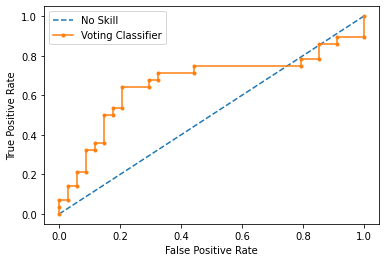

In [116]:
ns_probs = [0 for _ in range(len(y_test))]

svm_clf = SVC(C=0.75, kernel='linear', probability=True)
logistic_clf = LogisticRegression(C=1.5, penalty='l2')
rf_clf = RandomForestClassifier(criterion='gini', max_depth=200, n_estimators=100)

voting = VotingClassifier(estimators=[
  ('svm', svm_clf), ('lr', logistic_clf), ('rf', rf_clf),
], voting='soft')
voting.fit(X_train, y_train)
voting_probs = voting.predict_proba(X_test)
voting_probs = voting_probs[:, 1]

# calcualte scores
ns_auc = roc_auc_score(y_test, ns_probs)
voting_auc = roc_auc_score(y_test, voting_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Voting: ROC AUC=%.3f' % (voting_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
voting_fpr, voting_tpr, _ = roc_curve(y_test, voting_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(voting_fpr, voting_tpr, marker='.', label='Voting Classifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

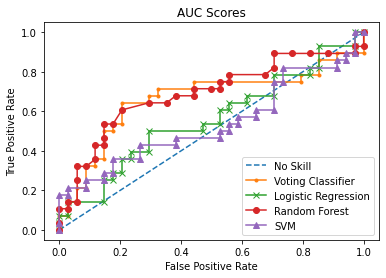

In [117]:
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(voting_fpr, voting_tpr, marker='.', label='Voting Classifier')
pyplot.plot(lr_fpr, lr_tpr, marker='x', label='Logistic Regression')
pyplot.plot(rf_fpr, rf_tpr, marker='o', label='Random Forest')
pyplot.plot(svm_fpr, svm_tpr, marker='^', label='SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('AUC Scores')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [118]:
print("====== Test AUC Scores ======")
print('No Skill: \t\t%.3f' % (ns_auc))
print("-----------------------------")
print('SVM: \t\t\t%.3f' % (svm_auc))
print('Random Forest: \t\t%.3f' % (rf_auc))
print('Logistic: \t\t%.3f' % (lr_auc))
print('Voting: \t\t%.3f' % (voting_auc))

====== Test AUC Scores ======
No Skill: 		0.500
-----------------------------
SVM: 			0.539
Random Forest: 		0.689
Logistic: 		0.559
Voting: 		0.664


In [119]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=250,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

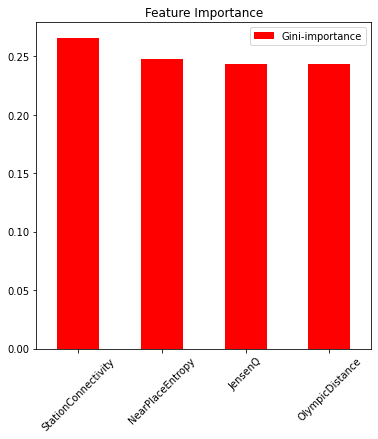

In [120]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, final_rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending=False).plot(kind='bar', color='red', rot=45, figsize=(6,6), title='Feature Importance')
